#DATA LOADING

In [1]:
!unzip "/content/drive/MyDrive/complaints.zip" -d "/content/drive/MyDrive/"

Archive:  /content/drive/MyDrive/complaints.zip
replace /content/drive/MyDrive/complaints.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/complaints.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv("/content/drive/MyDrive/complaints.csv")

<ipython-input-62-2df151a92331>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/complaints.csv")


#FIRST LETS SEE THE RELATION BETWEEN ANY TWO VARIABLE(EVEN IF DONT INCLUDE THEM IN THE INPUT OR OUTPUT VARIABLE) TO UNDERSTAND OR GAIN MORE INSIGHTS OF DATA

##1- LETS ANALYSE FROM WHICH STATES USERS ARE FILING MOST AND MINIMUM COMLAINTS

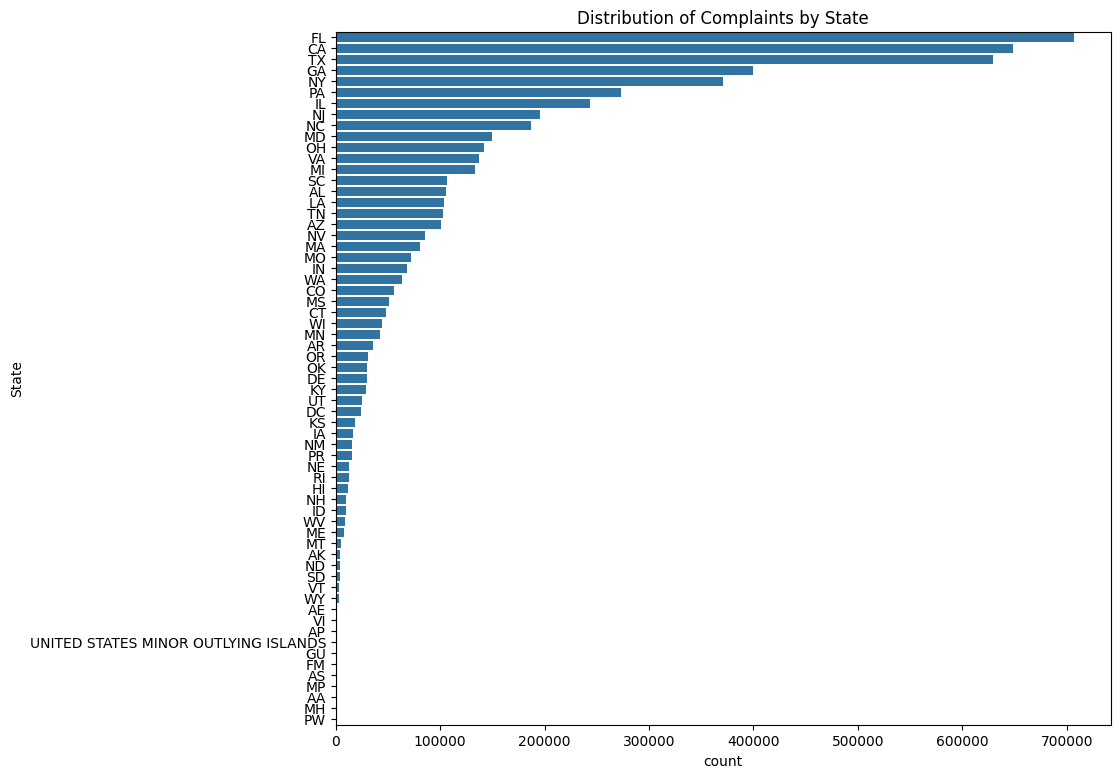

In [68]:
# Bar plot for 'State'
plt.figure(figsize=(10, 9))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title('Distribution of Complaints by State')
plt.show()


Conclusion :


1.   **We can see most complaints are comming from FL state.**
2.   **We can see minimum complaints are comming from PW state.**



:

##2- LETS ANALYSE DISTRIBUTION OF THE PRODUCTS

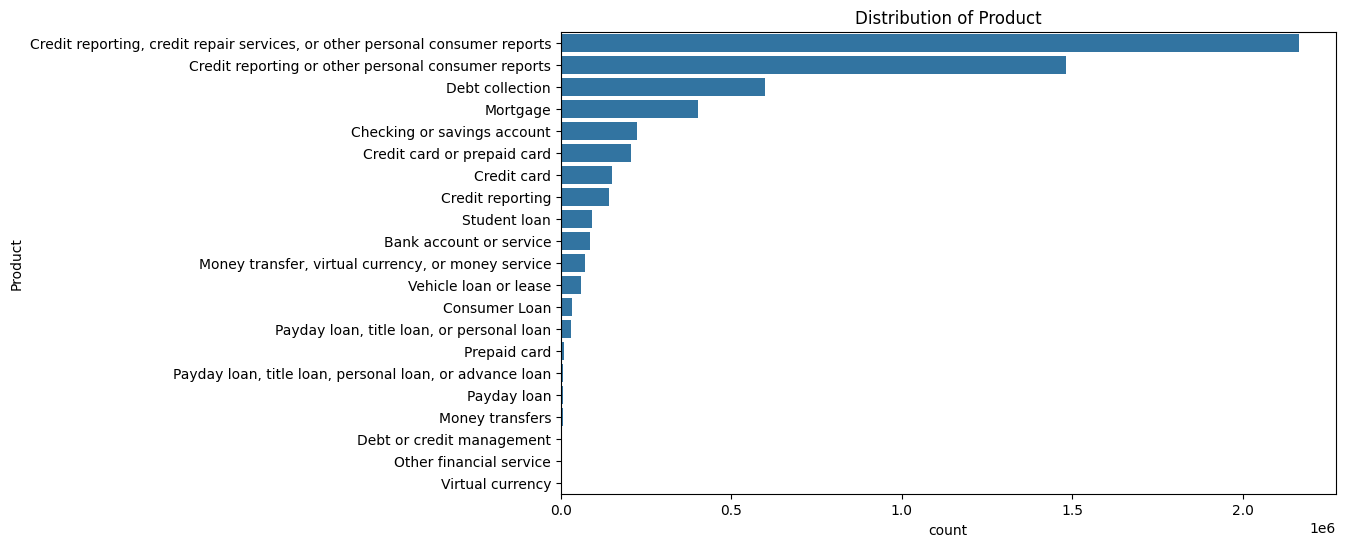

In [71]:
# Bar plot for 'Product'
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title('Distribution of Product')
plt.show()

**CONCLUSION -**


1.   **Credit reporting,credit repair is the product for which maximum complaints has been raised for.**
2.   **Payday loan,Money transfer , debt or credit management all has very low complaints.**



:

##3 - Lets analyze top 3 products from each states for which we recieve complaint.

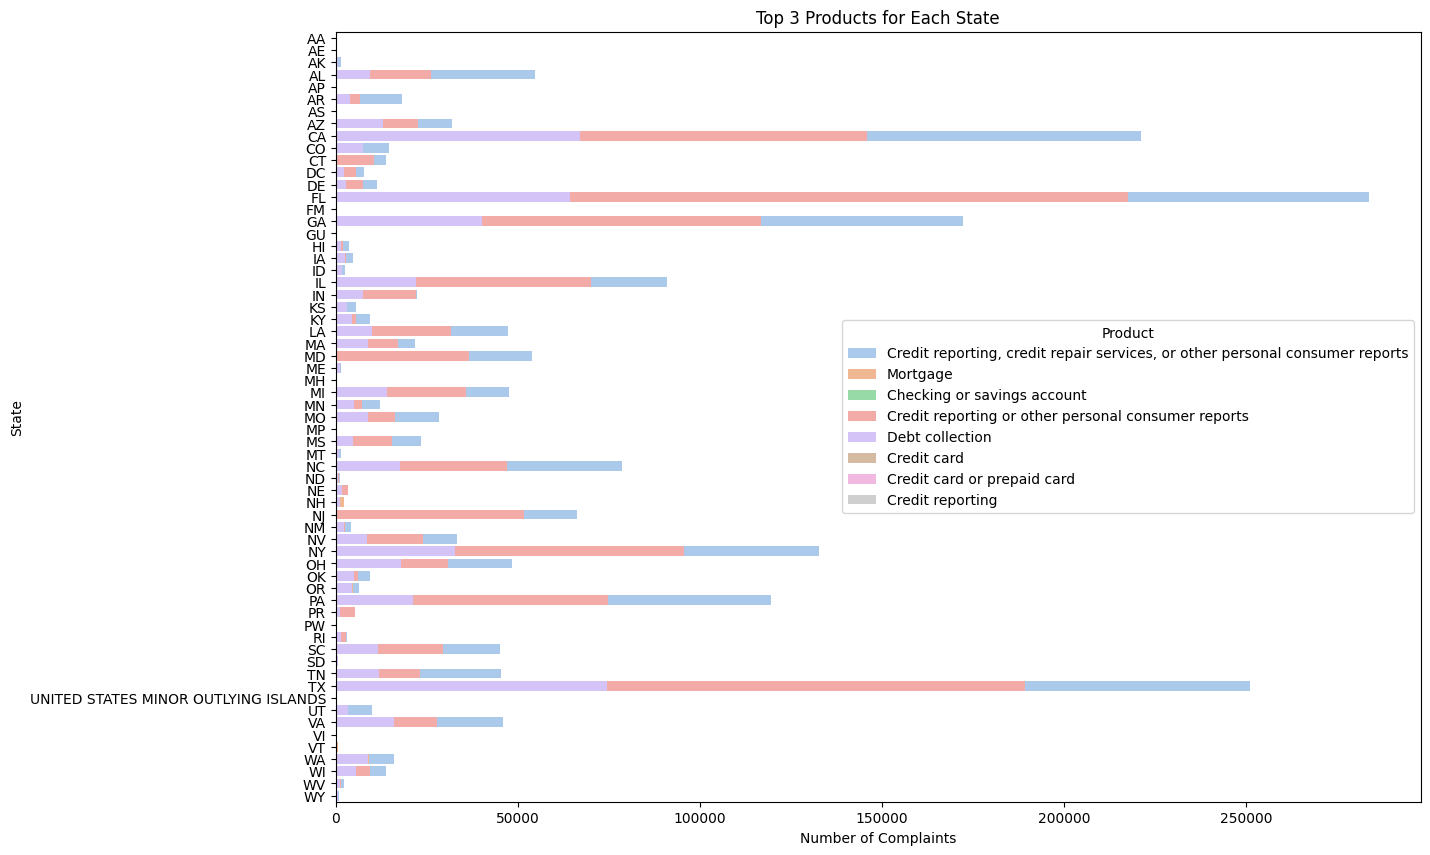

In [80]:
product_counts = df.groupby(['State', 'Product']).size().reset_index(name='Count')

top_products = product_counts.sort_values(['State', 'Count'], ascending=[True, False]).groupby('State').head(3)

plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='State', hue='Product', data=top_products, palette='pastel', dodge=False)
plt.title('Top 3 Products for Each State')
plt.xlabel('Number of Complaints')
plt.ylabel('State')
plt.legend(title='Product')
plt.show()


#INITIAL ANALYSIS OF DATAFRAME

###Lets analyse which columns should be used as input and target variable

In [63]:
df.head(1).T

,0
Date received,2024-07-15
Product,Credit reporting or other personal consumer re...
Sub-product,Credit reporting
Issue,Improper use of your report
Sub-issue,Reporting company used your report improperly
Consumer complaint narrative,NaN
Company public response,NaN
Company,Experian Information Solutions Inc.
State,AZ
ZIP code,85020


###From seeing the data we can drop some columns that are irrelevant.

**Should be removed -**


1.   Complaint ID: Unique identifier for each complaint; does not provide information relevant to predicting the product.
2.   Date received: Timestamp of when the complaint was received; generally irrelevant to the product itself.
3. ZIP code: Geographical data that may not directly influence the product prediction.
4.Consumer consent provided?: Consent details are unrelated to the product type being predicted.
5.Company public response: Company responses are not predictive of the product but of the company's actions.
6.Company response to consumer: Response specifics do not inform the product being predicted.
7.Timely response?: Timing of responses does not impact the product prediction.
8.Consumer disputed?: Whether the complaint was disputed does not directly influence product prediction.
9.Submitted via: Submission method is unrelated to predicting the product.
10.State: Geographic location is often not predictive of the product.




**Shoul not be removed -**


1.   Product: Target column for prediction; the variable we want to predict.
2.   Sub-product: Can provides additional context that may help in the prediction of the product.
3.Issue: Describes the type of problem which can be linked to certain products.
4.Sub-issue: Offers detailed insights into the issue that can help in predicting the product.
5.Consumer complaint narrative: Contains text data that can provide valuable context for predicting the product.



###Lets try to analyze one such column to see if removing it would not affect the model.

From the plot below we can see that there is no particular product that is only present in particular value of Consumer consent provided.
**Conclusion** -> From looking at the Consumer Consent column we can't classify a product into particular class.

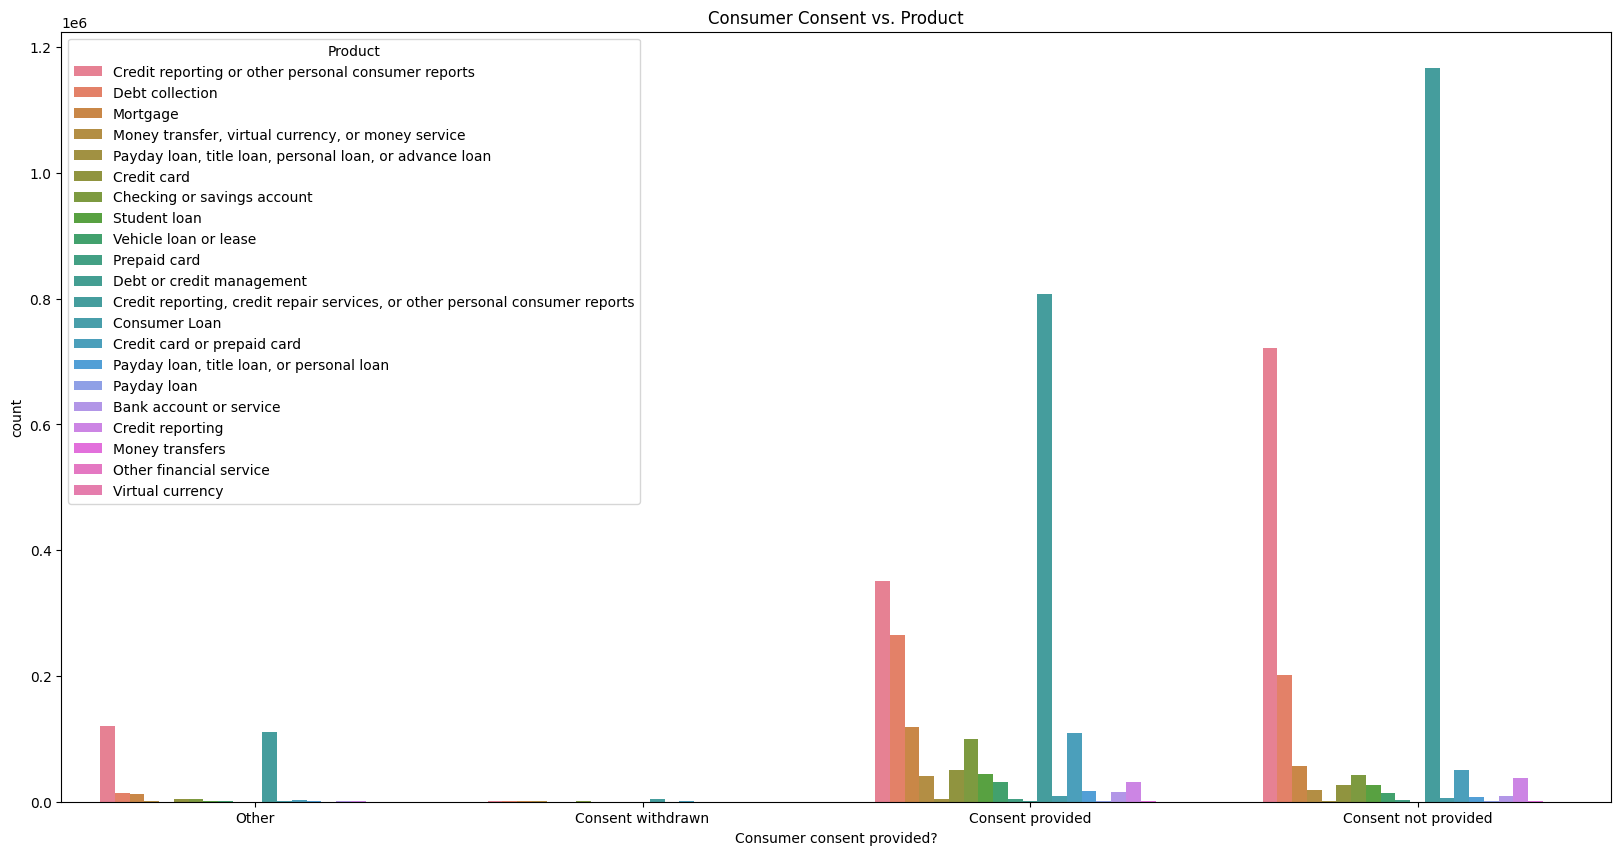

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Consumer consent provided?', hue='Product')
plt.title('Consumer Consent vs. Product')
plt.show()

###Similarly we can see Zip Code is also not at all correlated with the product.
**Conclusion** -> We can remove Zip Code

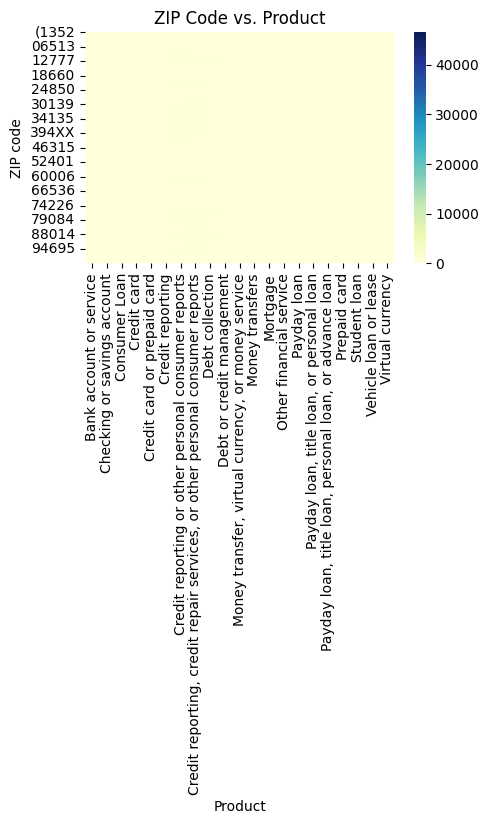

In [12]:
plt.figure(figsize=(5, 3))
sns.heatmap(pd.crosstab(df['ZIP code'], df['Product']), cmap='YlGnBu')
plt.title('ZIP Code vs. Product')
plt.show()

###And same plots can be created for rest of the columns.We can now remove the unwanted columns.

In [13]:
df.drop(['Date received','Company public response', 'Company','State', 'ZIP code', 'Tags', 'Consumer consent provided?','Submitted via', 'Date sent to company', 'Company response to consumer','Timely response?', 'Consumer disputed?', 'Complaint ID'],axis = 1,inplace = True)

In [14]:
df.head(1).T

,0
Product,Credit reporting or other personal consumer re...
Sub-product,Credit reporting
Issue,Improper use of your report
Sub-issue,Reporting company used your report improperly
Consumer complaint narrative,NaN


#Now lets see null values

In [15]:
df.isnull().sum()

,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,742930
Consumer complaint narrative,3764757


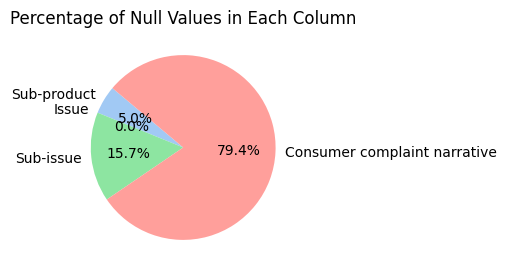

In [29]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Prepare data for pie chart
labels = null_percentages[null_percentages > 0].index
sizes = null_percentages[null_percentages > 0]

# Plot pie chart
plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Percentage of Null Values in Each Column')
plt.show()

###Since Product Columns Doesnt have null value and will be used as target variable ,lets analyze that first.

First we see the count of each class in the Product column

In [33]:
df['Product'].value_counts()

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",2163873
Credit reporting or other personal consumer reports,1480615
Debt collection,599721
Mortgage,402261
Checking or savings account,223853
Credit card or prepaid card,206373
Credit card,149767
Credit reporting,140429
Student loan,90980


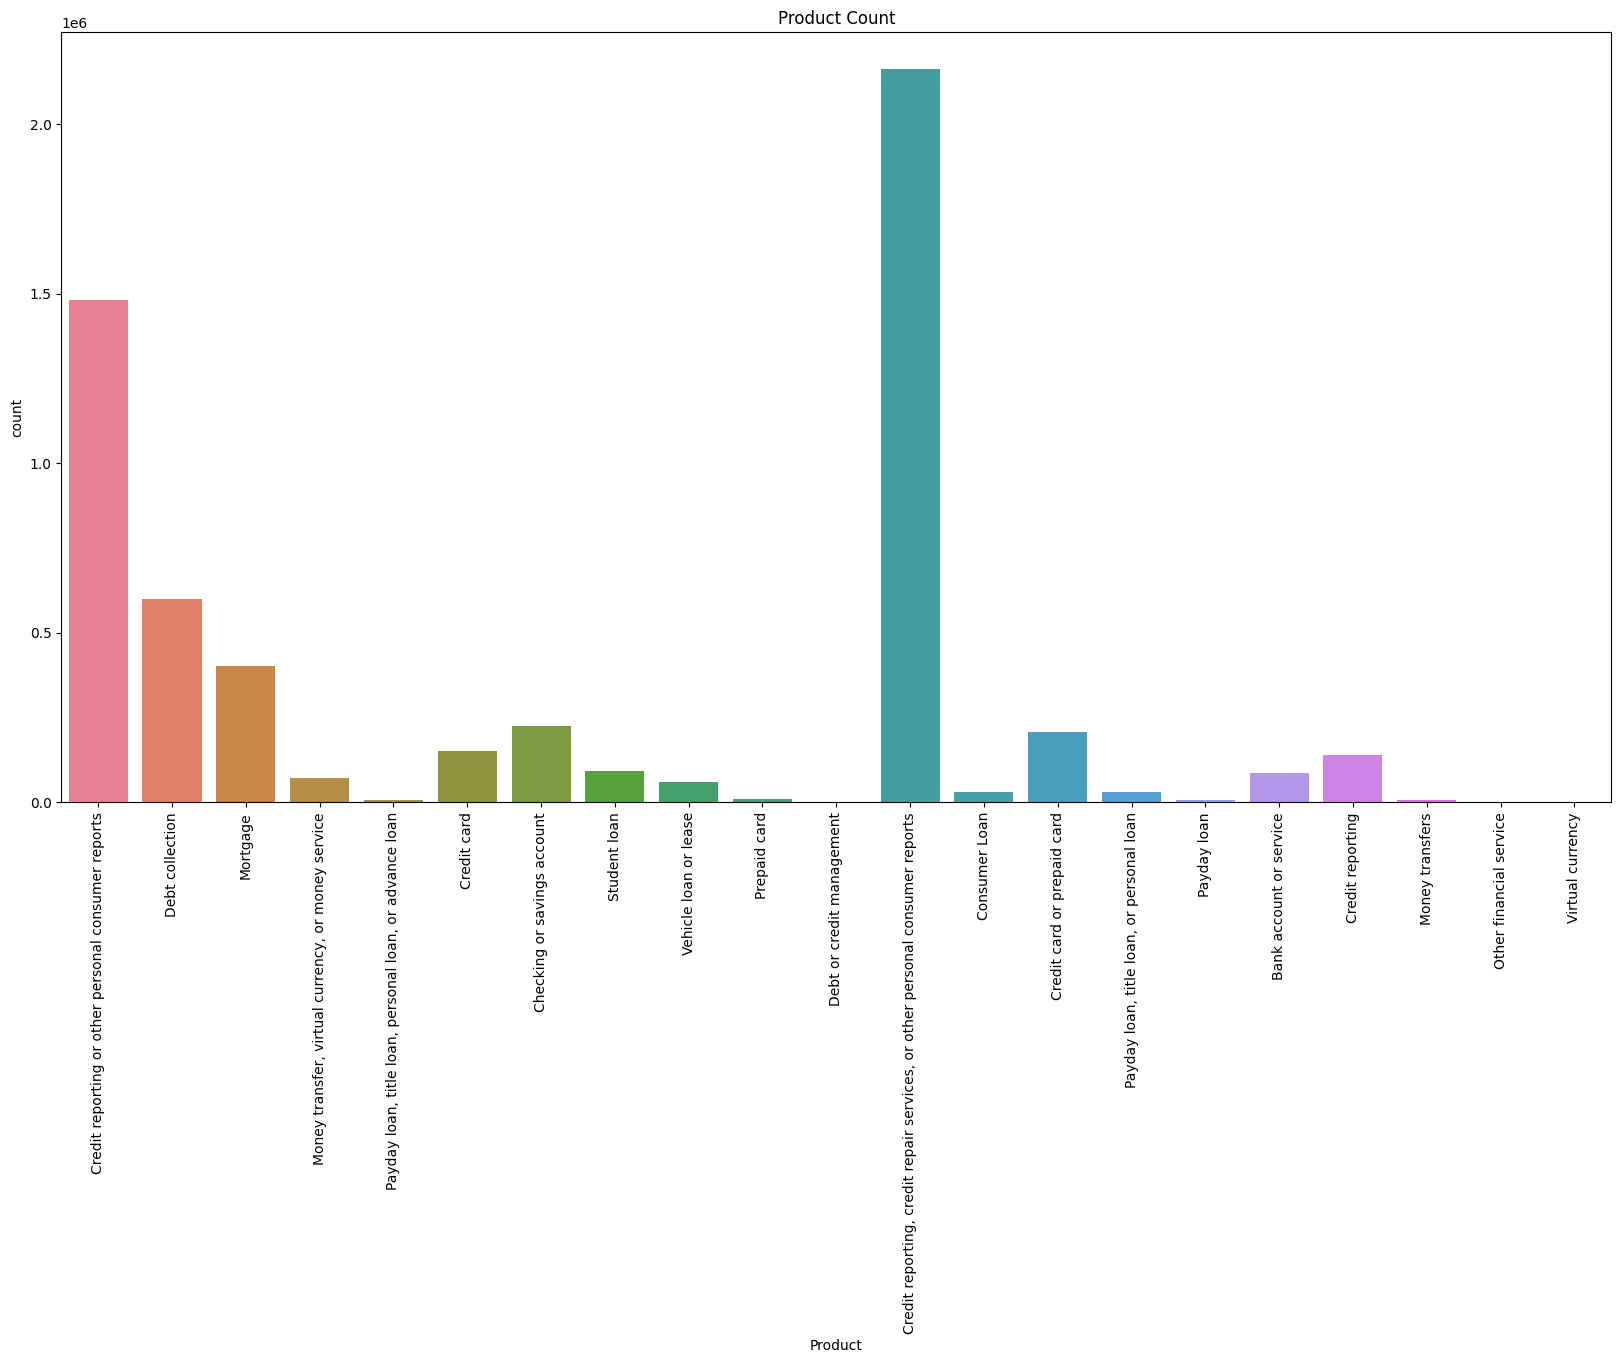

In [32]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Product', hue = 'Product')
plt.title('Product Count')
plt.xticks(rotation=90)
plt.show()

**Conclusion** : We can see from the above plot that Product column is highly imbalanced.
Following classes are in majority -


1.   ***Credit reporting, credit repair services, or other personal consumer reports***
2.   ***Credit reporting or other personal consumer reports***
3. ***Debt collection***



###From the values in the Product Columns we can see that some classes can we merged and make the target output more simpler. Following classes can be combined.



1.   Combine "**Credit reporting, credit repair services, or other personal consumer reports**" and "**Credit reporting or other personal consumer reports"**: These categories are very similar, both relating to credit reporting and consumer reports.
2.   Combine "**Credit card or prepaid card" with "Credit card" and "Prepaid card**": These categories can be merged as they all relate to credit cards or prepaid cards.
3.Combine "**Payday loan, title loan, or personal loan" with "Payday loan, title loan, personal loan, or advance loan" and "Payday loan"**: These categories are all types of small, short-term loans.
4.Combine **"Money transfer, virtual currency, or money service" with "Money transfers" and "Virtual currency"**: These categories can be grouped together as they all relate to financial transfers and virtual currency.
5.Combine **"Bank account or service" with "Checking or savings account"**: These categories can be merged as they both relate to bank accounts.
6.Combine **"Debt collection" and "Debt or credit management"**: These categories are related to handling debt.



:

Will use following code for merging the column

In [34]:
def merge_values(x,fromThis,to):
  if x in fromThis:
    return to
  else:
    return x

In [36]:
df['Product'] = df['Product'].apply(lambda x : merge_values(x,["Credit reporting, credit repair services, or other personal consumer reports","Credit reporting or other personal consumer reports","Credit reporting","Credit Reporting"],"Credit Reporting/Repair Services/Consumer Reports"))

In [37]:
df['Product'] = df['Product'].apply(lambda x : merge_values(x,["Credit card or prepaid card","Credit card","Prepaid card"],"Credit/Prepaid Cards"))

In [38]:
df['Product'] = df['Product'].apply(lambda x : merge_values(x,["Payday loan, title loan, or personal loan","Payday loan, title loan, personal loan, or advance loan","Payday loan","Consumer Loan"],"Personal Loan"))

In [39]:
df['Product'] = df['Product'].apply(lambda x : merge_values(x,["Money transfer, virtual currency, or money service","Money transfers","Virtual currency"],"Money Services/Transfer"))

In [40]:
df['Product'] = df['Product'].apply(lambda x : merge_values(x,["Bank account or service","Checking or savings account"],"Bank Account Services"))

In [41]:
df['Product'] = df['Product'].apply(lambda x : merge_values(x,["Debt collection","Debt or credit management"],"Debt Collection"))

:

####Lets see how many classes we have now -

In [42]:
df['Product'].value_counts()

,count
Product,
Credit Reporting/Repair Services/Consumer Reports,3784917
Debt Collection,601239
Mortgage,402261
Credit/Prepaid Cards,365833
Bank Account Services,310058
Student loan,90980
Money Services/Transfer,77216
Personal Loan,75000
Vehicle loan or lease,58383


:

####We can see there is "Other financial service" Value in Product.Changing product where they need not to be in Other Financial Service. This helps in a way that wrong example does not go into wrong classes which eventually helps model to learn better at time of training.Lets Analyze that and see what different sub-product it has.

In [44]:
df[df['Product'] == "Other financial service"]['Sub-product'].value_counts()

,count
Sub-product,
Debt settlement,333
Check cashing,266
Money order,143
Credit repair,102
Traveler’s/Cashier’s checks,88
Refund anticipation check,68
Foreign currency exchange,58


**Conclusion : **We can see from the above subproducts that these products should not be under "Other financial Services". We have separate classes for each. Lets change the Product from "Other financial Services" to respective Products.



1.  **Debt settlement**
2.   **Money order**
3. **Credit repair**




###After doing all these steps we have finaaly completed analyizing product.

#Lets Now Analyze our Input variable

Lets see how many null values we have

In [45]:
df.isnull().sum()

,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,742930
Consumer complaint narrative,3764757


###Now we will create our input column for our model by combining Sub-Product , Issue , Sub-Issue and Consumer complaint narrative

The reason for combining all are following ->


1.   There are 3764757 that is 65.2% data that is not present , either we could remove it and make our dataset smaller or we can combine all these columns because issue and sub issue are also kind of description of the consumer complain narative column but in brief.
2.   Combining all these column will help our model classify these products in separate classes since it will have additional information about sub-product, issue and sub-issue.

###Analyizing Sub-issue Column

In [47]:
df.isnull().sum()

,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,742930
Consumer complaint narrative,3764757


Lets see how many columns has Sub-issue and not Consumer Complain Narrative. This will help us determine that after combining both these columns how many rows will have null value left

In [48]:
len(df[(df['Sub-issue'].isnull() == False) & (df['Consumer complaint narrative'].isnull() == True)])


3251961

**Conclusion :** We could see out of **37 lakh** null values in Consumer complaint narrative	we will be able to eliminate **32 lakh** by adding these two columns. Similarly we will add **sub issue and sub product column** to further reduce the missing values

We dont need to analyze the values of Sub-issue column because it has values like ->


1.   Reporting company used your report improperly
2.   Their investigation did not fix an error on your report

All these column combined will make much more sense



:

###Analyzing Sub-Product Column

In [50]:
df['Sub-product'].value_counts()

,count
Sub-product,
Credit reporting,3616088
Checking account,237432
General-purpose credit card or charge card,212936
I do not know,147438
Other debt,115537
Conventional home mortgage,106457
Credit card debt,103534
Other mortgage,86631
Conventional fixed mortgage,70607


**Looking at the output above we can see there is "I do not know" value that does not make sense to be a subproduct and has	14 lakh such values.**

Lets see what all products has this "I do not know" value so that we can change it to the name of the product , it will be helpfull when we will be combining the all four columns - Issue, Sub-Issue, Sub-Product and Consumer Complaint Narative

In [51]:
df[df['Sub-product'] == "I do not know"]['Product'].value_counts()

,count
Product,
Debt Collection,147438


###**Conclusion : We can see all the "Debt Collection" Product has Sub-Product as "I do not know"**

Let change this value of " I do not know" to "Debt Collection"

In [52]:
df['Sub-product'] = df['Sub-product'].apply(lambda x : merge_values(x,["I do not know"],"Debt Collection"))

:

###NOW WE CAN COMBINE ALL THE FOUR COLUMNS TO MAKE A SINGLE INPUT COLUMN THAT WILL HAVE MORE DETAIL AND WILL ALSO HELP IN REDUCING ALMOST 34 LAKH VALUES AS SEEN BEFORE.

In [53]:
df['Sub-product'] = df['Sub-product'].fillna('')
df['Issue'] = df['Issue'].fillna('')
df['Sub-issue'] = df['Sub-issue'].fillna('')
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

In [55]:
df['Consumer Complaint'] = df['Sub-product'] + " " + df['Issue'] + " " + df['Sub-issue'] + " " + df['Consumer complaint narrative']

:

Now that we have combined all the values into one single 'Consumer Complaint' column, we can drop rest of the columns

In [56]:
df.drop(['Sub-product','Issue','Sub-issue','Consumer complaint narrative'],axis = 1,inplace = True)

In [57]:
df.head(2)

,Product,Consumer Complaint
0,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Improper use of your report R...
1,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Problem with a company's inve...


:

#LETS CHECK THE DUPLICATE VALUE IN OUR DATAFRAME

In [58]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 4170392


**Conclusion: There are 4170392 duplicate rows in the data**

We can remove these duplicate values. It would be of no use to train our model on duplicate values.

In [59]:
df = df.drop_duplicates(keep='first')

In [61]:
df.head(2)

,Product,Consumer Complaint
0,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Improper use of your report R...
1,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Problem with a company's inve...


In [60]:
df['Product'].value_counts()

,count
Product,
Credit Reporting/Repair Services/Consumer Reports,813654
Debt Collection,245522
Credit/Prepaid Cards,152671
Mortgage,119116
Bank Account Services,114681
Student loan,44014
Money Services/Transfer,42563
Personal Loan,32264
Vehicle loan or lease,31734


#This is our Final DF on which we can do text preprocessing